In [1]:
import numba as nb
from parcels.numba.field import Particle, GridSpec, create_chunks, FieldSet, NumbaParticle, FieldUV, particle_inner_loop
from parcels import AdvectionRK4
import numpy as np
from matplotlib import pyplot as plt
from numba import njit

In [2]:
np.random.seed(129837)

In [3]:
pset = [NumbaParticle(0.01) for _ in range(100)]


In [4]:
grid = GridSpec((-5, 5, 1000, 10), (-5, 5, 1000, 10))

In [5]:
def field_fun_v(lat_grid, lon_grid):
    alpha = np.arctan2(lon_grid, lat_grid)
    r = np.sqrt(lat_grid**2+lon_grid**2)
    v = -r*np.sin(alpha)
    return v

def field_fun_u(lat_grid, lon_grid):
    alpha = np.arctan2(lon_grid, lat_grid)
    r = np.sqrt(lat_grid**2+lon_grid**2)
    u = r*np.cos(alpha)
    return u


In [6]:
fieldU = create_chunks(grid, pset, field_fun_u)
fieldV = create_chunks(grid, pset, field_fun_v)

In [7]:
fieldset = FieldSet(grid, fieldU, fieldV)

In [8]:
NumbaAdvection = njit(AdvectionRK4)

<IPython.core.display.Javascript object>


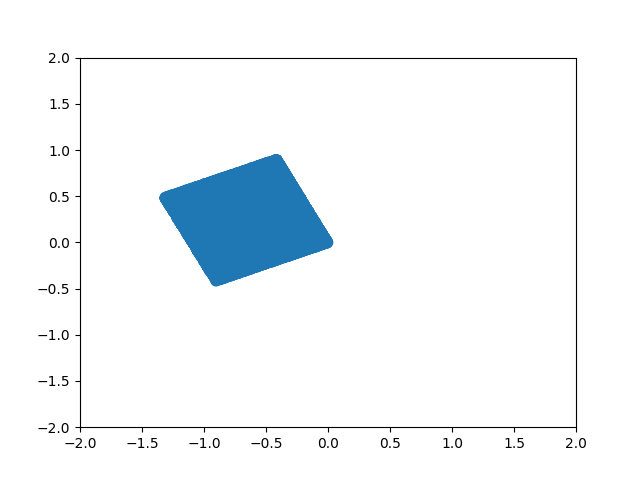

In [9]:
%matplotlib notebook
x = []
y = []
from matplotlib.animation import FuncAnimation
fig = plt.figure()
ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))
# fig, ax = plt.subplots()
scatter = ax.scatter([], [])

def init():
    scatter.set_offsets(np.zeros(0).reshape(-1, 2))
    return scatter, 
def animate(i):
    particle_inner_loop(pset, fieldset, 20)
    x = [p.lat for p in pset]
    y = [p.lon for p in pset]
    scatter.set_offsets(np.vstack([x, y]).T)
    return scatter,

anim = FuncAnimation(fig, animate, init_func=init, frames=1000, interval=5, blit=True)
plt.show()

In [16]:
pset = nb.typed.List()
for _ in range(10000):
    pset.append(NumbaParticle(0.01))

In [17]:
%%time

particle_inner_loop(pset, fieldset, 6*3600)

CPU times: user 2min 28s, sys: 82.9 ms, total: 2min 28s
Wall time: 2min 28s


In [15]:
len(pset)

100000